In [74]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st

In [69]:
df = pd.read_csv('/Users/huiqiongwu/Desktop/sales-analysis/WA_Marketing-Campaign.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


## Are the number of each promotion method simialr to others across all market size?

In [60]:
n = df.groupby(['MarketSize', 'Promotion']).MarketID.count().reset_index(name='Number of Promotion')
pivot_n = pd.pivot(n, index='MarketSize', columns='Promotion', values='Number of Promotion')
pivot_n

Promotion,1,2,3
MarketSize,,,
Large,56,64,48
Medium,96,108,116
Small,20,16,24


In [61]:
pivot_n['Total Promotion'] = pivot_n.sum(axis=1)

In [62]:
pivot_n

Promotion,1,2,3,Total Promotion
MarketSize,,,,
Large,56,64,48,168
Medium,96,108,116,320
Small,20,16,24,60


## What is the total sales distribution across different promotion?

In [35]:
s = df.groupby(['Promotion'])['SalesInThousands'].sum().reset_index(name='TotalSales')
s

,Promotion,TotalSales
0,1,9993.03
1,2,8897.93
2,3,10408.52


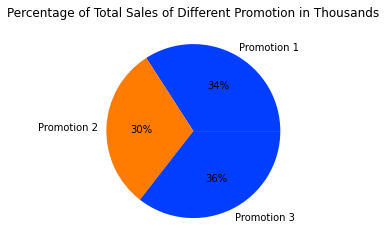

In [47]:
#distribution of total sales of promotion
labels = ['Promotion 1', 'Promotion 2', 'Promotion 3']
#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:2]

#create pie chart
plt.pie(s['TotalSales'], labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Percentage of Total Sales of Different Promotion in Thousands')
plt.show()

Based on the pie chart, ptomotion 3 generated the most total sales value

# A/B Testing

## Are sales of promotion 3 significantly different enough from others? 

### Hypothesis testing 1:
The null hypothesis: the difference between promotion 3 and promotion 1 is significant; promotion 3 has bettter performance than promotion 1
The alternate hypothesis: the difference between promotion 3 and promotion 1 is not significant

### Hypothesis testing 2:
The null hypothesis: the difference between promotion 3 and promotion 2 is significant; promotion 3 has bettter performance than promotion 2
The alternate hypothesis: the difference between promotion 3 and promotion 2 is not significant

In [75]:
promo_1 = df[df['Promotion']==1]['SalesInThousands']
promo_2 = df[df['Promotion']==2]['SalesInThousands']
promo_3 = df[df['Promotion']==3]['SalesInThousands']

In [85]:
def ab_test(a_df, b_df):
    a_mean = st.mean(a_df)
    b_mean = st.mean(b_df)
    a_std = st.pstdev(a_df)
    b_std = st.pstdev(b_df)
    t_value = stats.ttest_ind(a_df, b_df)
    return a_mean, b_mean, a_std, b_std, t_value

In [86]:
# t-test between promotion 3 and promotion 1
mean3, mean1, std3, std1, t_value = ab_test(promo_3, promo_1)
print('The mean of total sales of promotion 3: ',  mean3)
print('The mean of total sales of promotion 1: ',  mean1)
print('The standard deviation of total sales of promotion 3: ', std3)
print('The standard deviation of total sales of promotion 1: ', std1)
print("significance test: ", t_value, "\n")

The mean of total sales of promotion 3:  55.36446808510638
The mean of total sales of promotion 1:  58.099011627906975
The standard deviation of total sales of promotion 3:  16.72158027991051
The standard deviation of total sales of promotion 1:  16.505590091107884
significance test:  Ttest_indResult(statistic=-1.5551383687293547, pvalue=0.12079667272313273) 



In [87]:
# t-test between promotion 3 and promotion 2
mean3, mean2, std3, std2, t_value = ab_test(promo_3, promo_2)
print('The mean of total sales of promotion 3: ',  mean3)
print('The mean of total sales of promotion 2: ',  mean2)
print('The standard deviation of total sales of promotion 3: ', std3)
print('The standard deviation of total sales of promotion 2: ', std2)
print("significance test: ", t_value, "\n")

The mean of total sales of promotion 3:  55.36446808510638
The mean of total sales of promotion 2:  47.32941489361702
The standard deviation of total sales of promotion 3:  16.72158027991051
The standard deviation of total sales of promotion 2:  15.06871781448389
significance test:  Ttest_indResult(statistic=4.88139271089348, pvalue=1.562894303627738e-06) 



## Analysis:
1. Promotion 3 does not significantly perform better than promotion 1. 
   The t-test of promotion 1 and promotion 3 has p-value greater than 0.05 with high t-value so the difference bewteen promotion 3 and promotion 1 is not significant, the null hypothesis is rejected. 
   
2. Promotion 3 does significantly perform better than promotion 2. 
   The t-test of promotion 2 and promotion 3 has p-value smaller than 0.05 with low t-value so the difference bewteen promotion 3 and promotion 2 is significant, the null hypothesis is falied to reject.


## Do the insights become different when zooming in different market size?

In [90]:
d = df.groupby(['MarketSize', 'Promotion']).SalesInThousands.sum().reset_index(name='Total Sales')
pivot_d = pd.pivot(d, index='MarketSize', columns='Promotion', values='Total Sales')
pivot_d['Total Sales'] = pivot_d.sum(axis=1)
pivot_d

Promotion,1,2,3,Total Sales
MarketSize,,,,
Large,4213.21,3860.61,3705.79,11779.61
Medium,4576.57,4224.35,5274.39,14075.31
Small,1203.25,812.97,1428.34,3444.56


### Large market size

In [91]:
large = df[df['MarketSize']=='Large']
pro_1 = large[large['Promotion']==1]['SalesInThousands']
pro_2 = large[large['Promotion']==2]['SalesInThousands']
pro_3 = large[large['Promotion']==3]['SalesInThousands']

In [92]:
# t-test between promotion 3 and promotion 1
mean3, mean1, std3, std1, t_value = ab_test(pro_3, pro_1)
print('The mean of total sales of promotion 3: ',  mean3)
print('The mean of total sales of promotion 1: ',  mean1)
print('The standard deviation of total sales of promotion 3: ', std3)
print('The standard deviation of total sales of promotion 1: ', std1)
print("significance test: ", t_value, "\n")

The mean of total sales of promotion 3:  77.20395833333333
The mean of total sales of promotion 1:  75.23589285714286
The standard deviation of total sales of promotion 3:  14.24951150326204
The standard deviation of total sales of promotion 1:  15.358503202831242
significance test:  Ttest_indResult(statistic=0.6669468689809518, pvalue=0.5063120169025387) 



In [93]:
# t-test between promotion 2 and promotion 1
mean2, mean1, std2, std1, t_value = ab_test(pro_2, pro_1)
print('The mean of total sales of promotion 2: ',  mean2)
print('The mean of total sales of promotion 1: ',  mean1)
print('The standard deviation of total sales of promotion 2: ', std2)
print('The standard deviation of total sales of promotion 1: ', std1)
print("significance test: ", t_value, "\n")

The mean of total sales of promotion 2:  60.32203125
The mean of total sales of promotion 1:  75.23589285714286
The standard deviation of total sales of promotion 2:  15.605166430112927
The standard deviation of total sales of promotion 1:  15.358503202831242
significance test:  Ttest_indResult(statistic=-5.21755636059224, pvalue=7.854262204192481e-07) 



### Suggestion:
Promotion 1 performs better than promotion 2. Company can utilize proformance 1 and 3 for Large market size. 

### Medium market size

In [95]:
medium = df[df['MarketSize']=='Medium']
pro_1 = medium[medium['Promotion']==1]['SalesInThousands']
pro_2 = medium[medium['Promotion']==2]['SalesInThousands']
pro_3 = medium[medium['Promotion']==3]['SalesInThousands']

In [96]:
# t-test between promotion 3 and promotion 1
mean3, mean1, std3, std1, t_value = ab_test(pro_3, pro_1)
print('The mean of total sales of promotion 3: ',  mean3)
print('The mean of total sales of promotion 1: ',  mean1)
print('The standard deviation of total sales of promotion 3: ', std3)
print('The standard deviation of total sales of promotion 1: ', std1)
print("significance test: ", t_value, "\n")

The mean of total sales of promotion 3:  45.468879310344825
The mean of total sales of promotion 1:  47.672604166666666
The standard deviation of total sales of promotion 3:  8.056414104725086
The standard deviation of total sales of promotion 1:  8.025203170428105
significance test:  Ttest_indResult(statistic=-1.9765860321269122, pvalue=0.04939721833170492) 



In [98]:
# t-test between promotion 2 and promotion 3
mean2, mean3, std2, std3, t_value = ab_test(pro_2, pro_3)
print('The mean of total sales of promotion 2: ',  mean2)
print('The mean of total sales of promotion 3: ',  mean3)
print('The standard deviation of total sales of promotion 2: ', std2)
print('The standard deviation of total sales of promotion 3: ', std3)
print("significance test: ", t_value, "\n")

The mean of total sales of promotion 2:  39.11435185185185
The mean of total sales of promotion 3:  45.468879310344825
The standard deviation of total sales of promotion 2:  8.7665371001355
The standard deviation of total sales of promotion 3:  8.056414104725086
significance test:  Ttest_indResult(statistic=-5.627926077289621, pvalue=5.470518861290425e-08) 



### Suggestion:
Performace of promotion 3 is better than both those of promotion 2 anf promotion 1. Company can utilize promotion 3 for medium market

### Small market size

In [100]:
small = df[df['MarketSize']=='Small']
pro_1 = small[small['Promotion']==1]['SalesInThousands']
pro_2 = small[small['Promotion']==2]['SalesInThousands']
pro_3 = small[small['Promotion']==3]['SalesInThousands']

In [101]:
# t-test between promotion 3 and promotion 1
mean3, mean1, std3, std1, t_value = ab_test(pro_3, pro_1)
print('The mean of total sales of promotion 3: ',  mean3)
print('The mean of total sales of promotion 1: ',  mean1)
print('The standard deviation of total sales of promotion 3: ', std3)
print('The standard deviation of total sales of promotion 1: ', std1)
print("significance test: ", t_value, "\n")

The mean of total sales of promotion 3:  59.51416666666667
The mean of total sales of promotion 1:  60.1625
The standard deviation of total sales of promotion 3:  5.102933728639721
The standard deviation of total sales of promotion 1:  4.997453226394421
significance test:  Ttest_indResult(statistic=-0.41385419784316163, pvalue=0.6810867067433423) 



In [102]:
# t-test between promotion 2 and promotion 3
mean2, mean3, std2, std3, t_value = ab_test(pro_2, pro_3)
print('The mean of total sales of promotion 2: ',  mean2)
print('The mean of total sales of promotion 3: ',  mean3)
print('The standard deviation of total sales of promotion 2: ', std2)
print('The standard deviation of total sales of promotion 3: ', std3)
print("significance test: ", t_value, "\n")

The mean of total sales of promotion 2:  50.810625
The mean of total sales of promotion 3:  59.51416666666667
The standard deviation of total sales of promotion 2:  5.6834248793641144
The standard deviation of total sales of promotion 3:  5.102933728639721
significance test:  Ttest_indResult(statistic=-4.919628529158041, pvalue=1.7059958706547655e-05) 



### Suggestion:
The performace of promotion 3 is better than promotion 2. Company can utilize promotion 3 and promotion 1 for small market